In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Import Data Set
data = pd.read_csv("data/delta_public_00_12.csv", encoding = "ISO-8859-1")

C:\ProgramData\mambaforge\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
#data.head(5)
#General Info
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87560 entries, 0 to 87559
Columns: 974 entries, groupid to Isalarytotal
dtypes: float64(550), int64(419), object(5)
memory usage: 650.7+ MB


,groupid,academicyear,unitid_linchpin,unitid,isgrouped,instname,TCSName,city,state,zip,...,Iptall1,Iptall2,Iptall3,Iptall4,Iptall5,Iptall6,Iptall7,Iptall8,Ifaculty_instr_headcount,Isalarytotal
0,-475291,2012,475291,475291,0,Brown College-Brooklyn Center,NaN,Brooklyn Center,MN,55430,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2
1,-475282,2012,475282,475282,0,Marian Health Careers Center-Van Nuys Campus,NaN,Van Nuys,CA,91411,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2
2,-475273,2012,475273,475273,0,Springfield College-School of Human Services,NaN,Springfield,MA,01109,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2
3,-475255,2012,475255,475255,0,American Broadcasting School-Online Program,NaN,Oklahoma City,OK,73115,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2
4,-475246,2012,475246,475246,0,Kaplan College-Chesapeake,NaN,Chesapeake,VA,23320,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2


In [4]:
#Too much data at the National level, so limit to Florida
fl_data_raw = data[data["state"] == "FL"]

In [5]:
fl_data_raw.head(15)

,groupid,academicyear,unitid_linchpin,unitid,isgrouped,instname,TCSName,city,state,zip,...,Iptall1,Iptall2,Iptall3,Iptall4,Iptall5,Iptall6,Iptall7,Iptall8,Ifaculty_instr_headcount,Isalarytotal
25,-474942,2012,474942,474942,0,Hair Design Institute,NaN,Apopka,FL,32703,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2
26,-474933,2012,474933,474933,0,Hair Design Institute,NaN,Boynton Beach,FL,33435,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2
37,-470889,2012,470889,470889,0,ITT Technical Institute-Orlando,NaN,Orlando,FL,32819-9025,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2
40,-470852,2012,470852,470852,0,ITT Technical Institute-University Park,NaN,University Park,FL,34201-3007,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2
64,-468732,2012,468732,468732,0,Beauty Schools of America,NaN,Miami Beach,FL,33139-6504,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2
106,-462035,2012,462035,462035,0,Florida Academy,NaN,Fort Myers,FL,33966-1155,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2
121,-461883,2012,461883,461883,0,Millennia Atlantic University,NaN,Doral,FL,33178-2369,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2
142,-461670,2012,461670,461670,0,American Health Institute,NaN,Port Richey,FL,34654-3743,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2
143,-461661,2012,461661,461661,0,Progressive Training Centers,NaN,Pompano Beach,FL,33060-9238,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2
158,-461519,2012,461519,461519,0,Notter School of Pastry Arts,NaN,Orlando,FL,32809-7755,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2


In [6]:
#Sort out statistics from the... 947 available... Jeez.
#I selected 15 variables, to keep it simple.
fl_data = fl_data_raw[["academicyear", "instname", "nettuition01", "net_student_tuition", 
                       "fte_count", "unrestricted_revenue", "restricted_revenue", 
                       "studserv02", "acadsupp02", "instsupp02", "opermain02", "auxiliary02",
                       "applicantcount", "admitcount", "enrollftcount"]]

fl_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4166 entries, 25 to 87344
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   academicyear          4166 non-null   int64  
 1   instname              4166 non-null   object 
 2   nettuition01          3510 non-null   float64
 3   net_student_tuition   3517 non-null   float64
 4   fte_count             3599 non-null   float64
 5   unrestricted_revenue  3512 non-null   float64
 6   restricted_revenue    2953 non-null   float64
 7   studserv02            1389 non-null   float64
 8   acadsupp02            1352 non-null   float64
 9   instsupp02            1387 non-null   float64
 10  opermain02            823 non-null    float64
 11  auxiliary02           802 non-null    float64
 12  applicantcount        1172 non-null   float64
 13  admitcount            1172 non-null   float64
 14  enrollftcount         1916 non-null   float64
dtypes: float64(13), int

In [7]:
#Any null values mean that they were not reported by the institution. For our purposes, we will ignore them.
fl_data.describe()
#Academic Year ranges from 2000 to 2012
#All revenue and expenditures are numeric in nature.
#Applicant, Admission, and Enrollment numbers are all integers.
#The only non numeric value is the Institution Name

,academicyear,nettuition01,net_student_tuition,fte_count,unrestricted_revenue,restricted_revenue,studserv02,acadsupp02,instsupp02,opermain02,auxiliary02,applicantcount,admitcount,enrollftcount
count,4166.000000,3.510000e+03,3.517000e+03,3599.000000,3.512000e+03,2.953000e+03,1.389000e+03,1.352000e+03,1.387000e+03,8.230000e+02,8.020000e+02,1172.000000,1172.000000,1916.000000
mean,2005.841575,1.729496e+07,1.145714e+07,2488.726808,3.569348e+07,2.128958e+07,3.073490e+06,4.467762e+06,4.997850e+06,2.875456e+06,3.971506e+06,2179.499863,1202.382838,345.494030
std,3.955498,6.484042e+07,5.941130e+07,5978.854596,9.852562e+07,1.311107e+08,4.545973e+06,1.085938e+07,9.696399e+06,4.696287e+06,9.790973e+06,5219.494896,2655.811749,960.432005
min,2000.000000,-2.736279e+09,-2.736521e+09,0.785714,-6.948000e+06,-3.292195e+06,1.350000e+03,9.400000e+01,8.700000e+01,1.966000e+03,2.310000e+02,0.000000,0.000000,0.000000
25%,2002.000000,1.016712e+06,3.865130e+05,152.000000,1.487504e+06,1.790140e+05,3.015520e+05,2.034818e+05,5.214085e+05,2.636100e+05,1.426525e+05,66.750000,49.750000,0.000000
50%,2006.000000,3.440776e+06,1.731047e+06,493.000000,5.902776e+06,1.012063e+06,1.143188e+06,6.709100e+05,1.607273e+06,9.967510e+05,3.887285e+05,290.500000,182.500000,28.500000
75%,2009.000000,1.475292e+07,8.322387e+06,1525.310387,2.287375e+07,6.218786e+06,3.789087e+06,2.983158e+06,4.960926e+06,3.252820e+06,1.453823e+06,1403.750000,819.500000,240.000000
max,2012.000000,5.408713e+08,5.206120e+08,47850.000000,1.097421e+09,4.043488e+09,3.194805e+07,9.101000e+07,7.643900e+07,3.023270e+07,6.584825e+07,33968.000000,16577.000000,9985.000000


In [8]:
fl_data.head()

,academicyear,instname,nettuition01,net_student_tuition,fte_count,unrestricted_revenue,restricted_revenue,studserv02,acadsupp02,instsupp02,opermain02,auxiliary02,applicantcount,admitcount,enrollftcount
25,2012,Hair Design Institute,1039850.0,576936.0,70.0,1039850.0,10095.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,2012,Hair Design Institute,940988.0,626885.0,58.0,940988.0,29670.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,2012,ITT Technical Institute-Orlando,2515834.0,1165091.0,172.0,2515834.0,NaN,NaN,NaN,NaN,NaN,NaN,192.0,144.0,53.0
40,2012,ITT Technical Institute-University Park,1324011.0,583799.0,80.0,1324011.0,NaN,NaN,NaN,NaN,NaN,NaN,90.0,70.0,17.0
64,2012,Beauty Schools of America,937160.0,451468.0,191.0,937160.0,118185.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#print(fl_data["instname"].apply(lambda col: col.unique()))
#fl_data.instname.unique()

In [10]:
#All instututions have a year and name provided.
fl_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4166 entries, 25 to 87344
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   academicyear          4166 non-null   int64  
 1   instname              4166 non-null   object 
 2   nettuition01          3510 non-null   float64
 3   net_student_tuition   3517 non-null   float64
 4   fte_count             3599 non-null   float64
 5   unrestricted_revenue  3512 non-null   float64
 6   restricted_revenue    2953 non-null   float64
 7   studserv02            1389 non-null   float64
 8   acadsupp02            1352 non-null   float64
 9   instsupp02            1387 non-null   float64
 10  opermain02            823 non-null    float64
 11  auxiliary02           802 non-null    float64
 12  applicantcount        1172 non-null   float64
 13  admitcount            1172 non-null   float64
 14  enrollftcount         1916 non-null   float64
dtypes: float64(13), int

In [11]:
#Time to make graphs! 4166 is way too many to fit into a graph,
#so we will select ONLY State University System Universities in Florida. There is no flag for this.

#sus_data = fl_data.loc[fl_data["instname"] == ("University of Central Florida", "University of Florida"
                                  #"Florida International University", "Florida Atlantic University", 
                                  #"Florida Agricultural and Mechanical University", "New College of Florida",
                                  #"University of North Florida", "University of South Florida", 
                                  #"University of West Florida")]
                
sus_data = fl_data.loc[fl_data["instname"].isin(["University of Central Florida", "University of Florida"
                    "Florida International University", "Florida Atlantic University", 
                    "Florida Agricultural and Mechanical University", "New College of Florida",
                    "University of North Florida", "University of South Florida", 
                    "The University of West Florida"])]
sus_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 23672 to 87129
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   academicyear          86 non-null     int64  
 1   instname              86 non-null     object 
 2   nettuition01          86 non-null     float64
 3   net_student_tuition   86 non-null     float64
 4   fte_count             86 non-null     float64
 5   unrestricted_revenue  86 non-null     float64
 6   restricted_revenue    86 non-null     float64
 7   studserv02            66 non-null     float64
 8   acadsupp02            66 non-null     float64
 9   instsupp02            66 non-null     float64
 10  opermain02            66 non-null     float64
 11  auxiliary02           64 non-null     float64
 12  applicantcount        65 non-null     float64
 13  admitcount            65 non-null     float64
 14  enrollftcount         72 non-null     float64
dtypes: float64(13), in

<AxesSubplot:xlabel='academicyear', ylabel='applicantcount'>

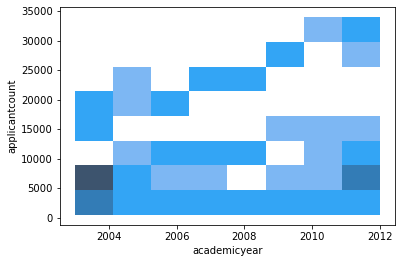

In [12]:
#Now that that's sorted... Let's take a look at some stats for the SUS
sns.histplot(data = sus_data, x = "academicyear", y='applicantcount')

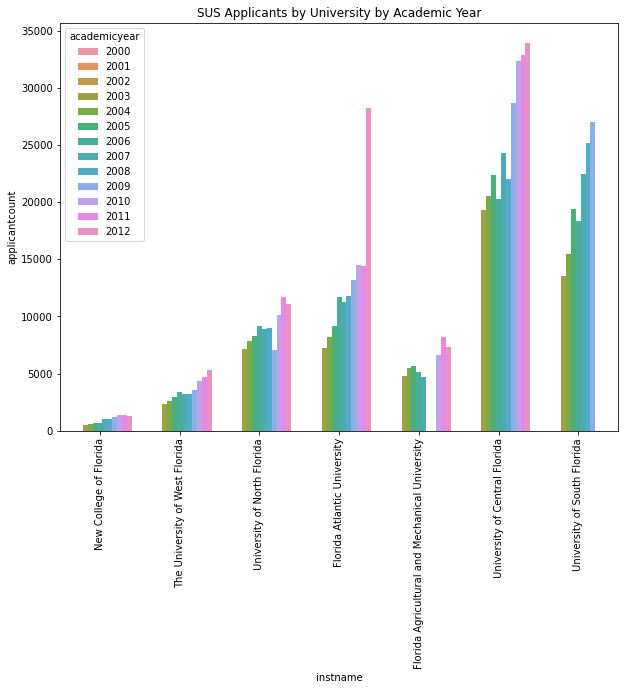

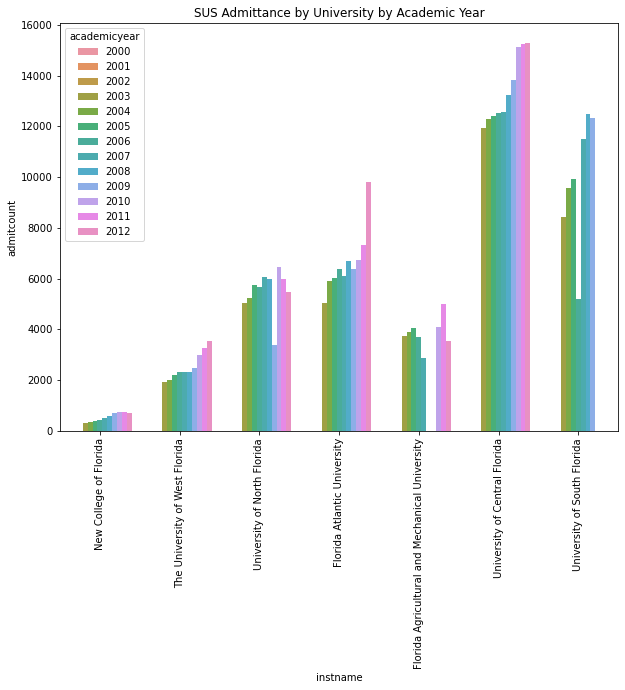

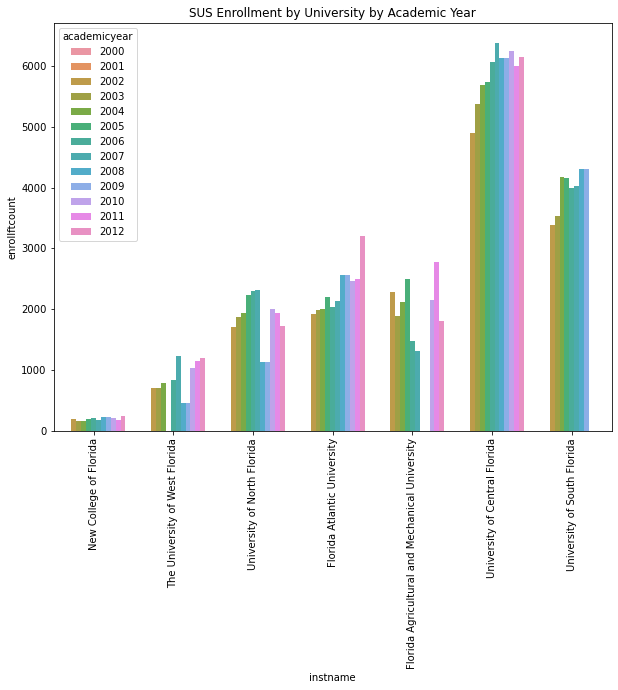

In [13]:
#What have universities reported for their applicants, vs their admittants, vs their enrollments

#plots = sns.FacetGrid(sus_data, col ="instname")
#plots.map(sns.barplot,'academicyear','applicantcount')
plt.rcParams["figure.figsize"] = [10, 7.5]
plotApplicant = sns.barplot(x = "instname", y = "applicantcount", 
            data = sus_data, hue = "academicyear")
plt.xticks(rotation = 90)
plt.title("SUS Applicants by University by Academic Year")
plt.show()

plt.rcParams["figure.figsize"] = [10, 7.5]
plotAdmitted = sns.barplot(x = "instname", y = "admitcount", 
            data = sus_data, hue = "academicyear")
plt.xticks(rotation = 90)
plt.title("SUS Admittance by University by Academic Year")
plt.show()

plt.rcParams["figure.figsize"] = [10, 7.5]
plotEnrolled = sns.barplot(x = "instname", y = "enrollftcount", 
            data = sus_data, hue = "academicyear")
plt.xticks(rotation = 90)
plt.title("SUS Enrollment by University by Academic Year")
plt.show()

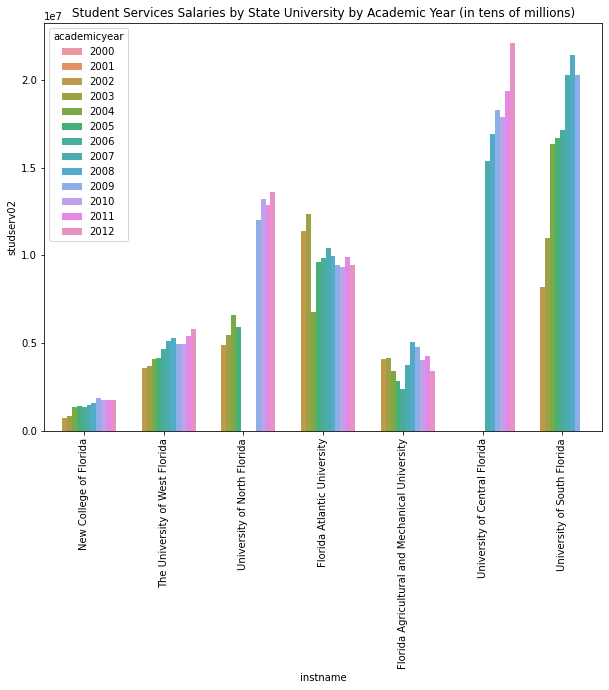

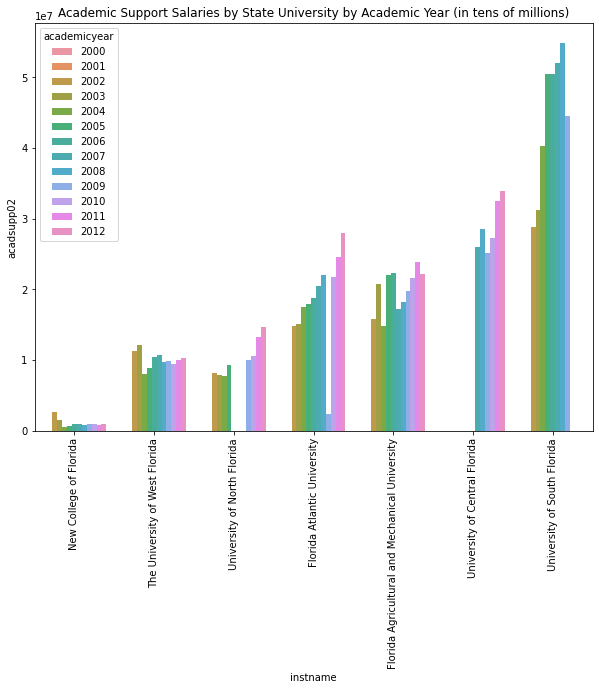

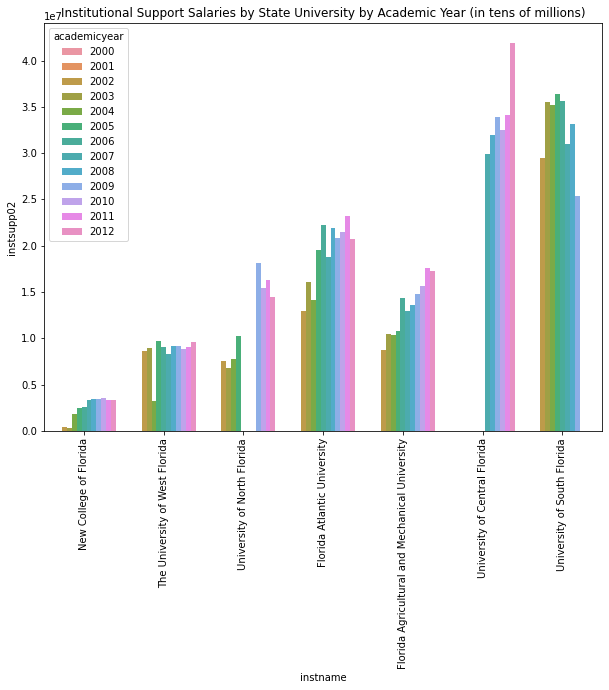

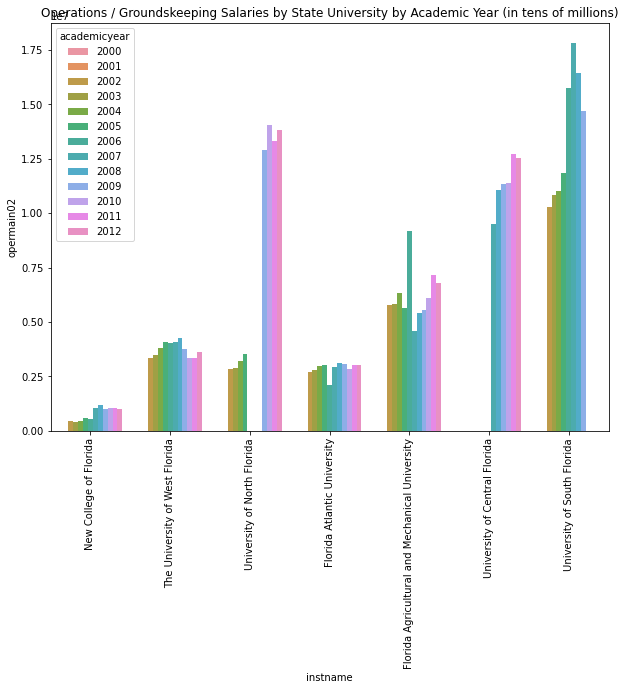

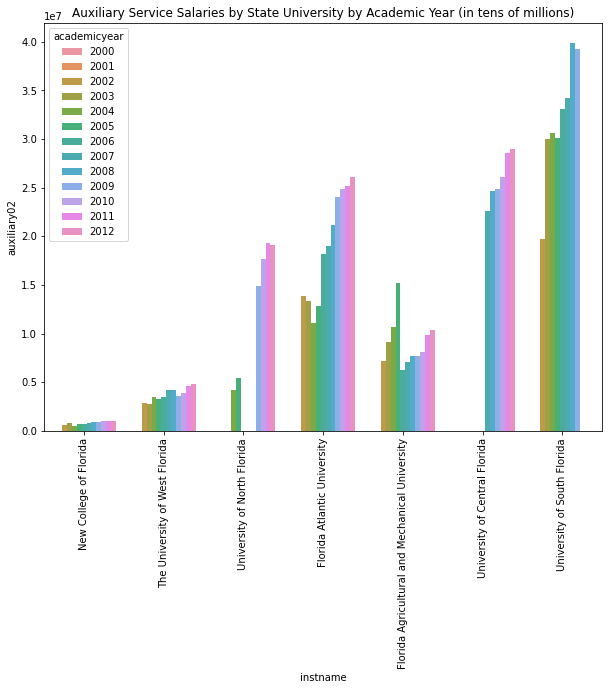

In [14]:
#What have universities reported for expenditures in certain categories

#plots = sns.FacetGrid(sus_data, col ="instname")
#plots.map(sns.barplot,'academicyear','applicantcount')
plt.rcParams["figure.figsize"] = [10, 7.5]
plotStudServ = sns.barplot(x = "instname", y = "studserv02", 
            data = sus_data, hue = "academicyear")
plt.xticks(rotation = 90)
plt.title("Student Services Salaries by State University by Academic Year (in tens of millions)")
plt.show()

plt.rcParams["figure.figsize"] = [10, 7.5]
plotAcadSupp = sns.barplot(x = "instname", y = "acadsupp02", 
            data = sus_data, hue = "academicyear")
plt.xticks(rotation = 90)
plt.title("Academic Support Salaries by State University by Academic Year (in tens of millions)")
plt.show()

plt.rcParams["figure.figsize"] = [10, 7.5]
plotInstSupp = sns.barplot(x = "instname", y = "instsupp02", 
            data = sus_data, hue = "academicyear")
plt.xticks(rotation = 90)
plt.title("Institutional Support Salaries by State University by Academic Year (in tens of millions)")
plt.show()

plt.rcParams["figure.figsize"] = [10, 7.5]
plotGrounds = sns.barplot(x = "instname", y = "opermain02", 
            data = sus_data, hue = "academicyear")
plt.xticks(rotation = 90)
plt.title("Operations / Groundskeeping Salaries by State University by Academic Year (in tens of millions)")
plt.show()

plt.rcParams["figure.figsize"] = [10, 7.5]
plotAuxiliary = sns.barplot(x = "instname", y = "auxiliary02", 
            data = sus_data, hue = "academicyear")
plt.xticks(rotation = 90)
plt.title("Auxiliary Service Salaries by State University by Academic Year (in tens of millions)")
plt.show()

C:\Users\Dkmstr\AppData\Local\Temp/ipykernel_14324/2559983409.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sus_data["percent_accept"] = sus_data["admitcount"] / sus_data["applicantcount"]


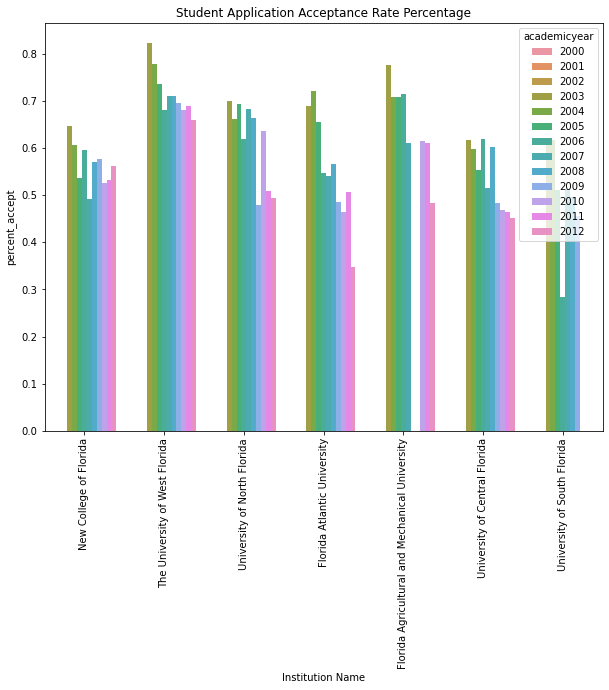

C:\Users\Dkmstr\AppData\Local\Temp/ipykernel_14324/2559983409.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sus_data["percent_enroll"] = sus_data["enrollftcount"] / sus_data["admitcount"]


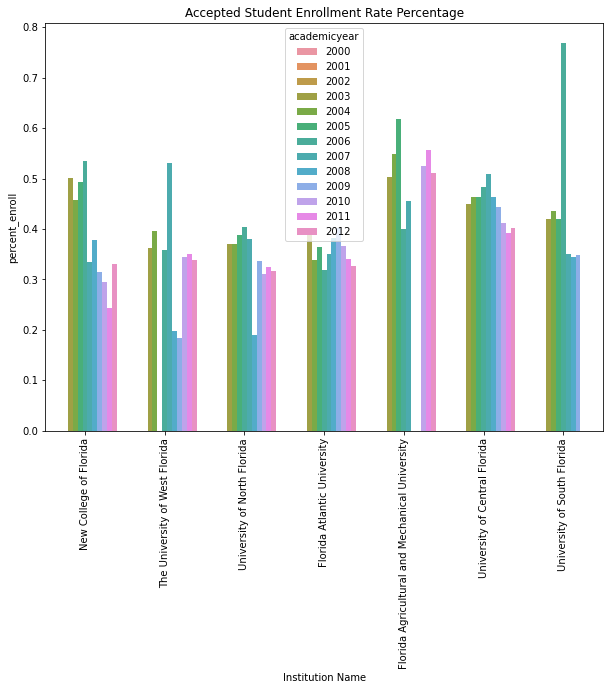

In [15]:
#Interesting Question: What percentage of applicants are admitted for each State University?

sus_data["percent_accept"] = sus_data["admitcount"] / sus_data["applicantcount"]

plt.rcParams["figure.figsize"] = [10, 7.5]
plotAcceptRate = sns.barplot(x = "instname", y = "percent_accept", 
            data = sus_data, hue = "academicyear")
plt.xticks(rotation = 90)
plt.title("Student Application Acceptance Rate Percentage")
plt.xlabel("Institution Name")
plt.show()

#Additionally, what percentage of accepted students actually choose to enroll?
sus_data["percent_enroll"] = sus_data["enrollftcount"] / sus_data["admitcount"]

plt.rcParams["figure.figsize"] = [10, 7.5]
plotAcceptRate = sns.barplot(x = "instname", y = "percent_enroll", 
            data = sus_data, hue = "academicyear")
plt.xticks(rotation = 90)
plt.title("Accepted Student Enrollment Rate Percentage")
plt.xlabel("Institution Name")
plt.show()

In [16]:
#Can we compare SUS to non-SUS entities in different fields?
fl_data["is_SUS"] = np.where(fl_data["instname"].isin(["University of Central Florida", "University of Florida"
                    "Florida International University", "Florida Atlantic University", 
                    "Florida Agricultural and Mechanical University", "New College of Florida",
                    "University of North Florida", "University of South Florida", 
                    "The University of West Florida"]), 1, 0)

C:\Users\Dkmstr\AppData\Local\Temp/ipykernel_14324/3290436890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fl_data["is_SUS"] = np.where(fl_data["instname"].isin(["University of Central Florida", "University of Florida"


In [17]:
#fl_data["is_SUS"].unique()

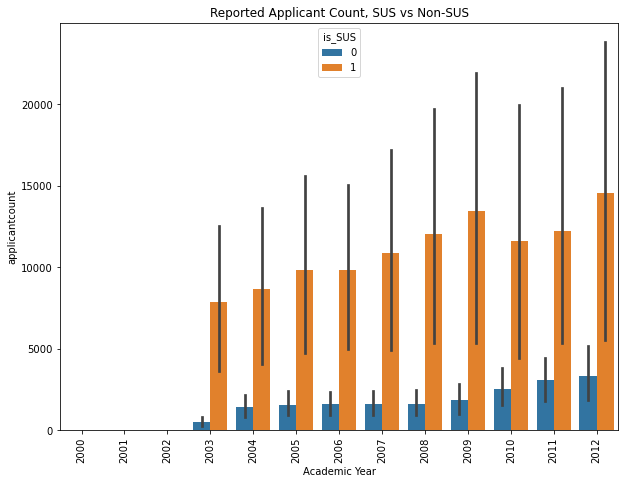

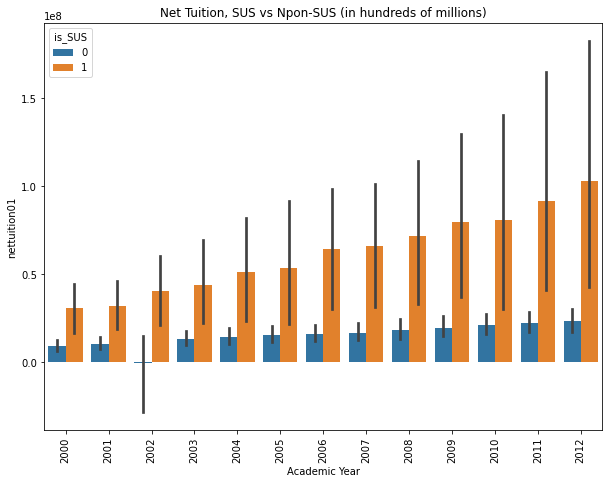

In [18]:
plt.rcParams["figure.figsize"] = [10, 7.5]
plotEnrollSUSvsNon = sns.barplot(x = "academicyear", y = "applicantcount", 
            data = fl_data, hue = "is_SUS")
plt.xticks(rotation = 90)
plt.title("Reported Applicant Count, SUS vs Non-SUS")
plt.xlabel("Academic Year")
plt.show()

#Data is not useful, as most non-SUS do not report their applicant count

plt.rcParams["figure.figsize"] = [10, 7.5]
plotStudentTuition = sns.barplot(x = "academicyear", y = "nettuition01", 
            data = fl_data, hue = "is_SUS")
plt.xticks(rotation = 90)
plt.title("Net Tuition, SUS vs Npon-SUS (in hundreds of millions)")
plt.xlabel("Academic Year")
plt.show()

#Also not useful